## Tutorial on how to use inetmodels python API

### Main Website: http://inetmodels.com

1. Download inetmodels.py file from the github repository/the main website

2. Import the library

```python
from inetmodels import *
```
3. Initialize the Inetmodels class. It will also show the network type and categories that are available

```python
k=Inetmodels()
```

4. Check the specific network that you want

```python
k.printCategories(networkType,categoryType)
```

5. Query the genes/analytes that you need

```python
k.query(networkType, # MON or GCN, default = ""
      categoryType, # integer, default = 0
      categoryName, # string, default = ""
      search, #list of strings, default = []
      pruning, #float, default = 2.5, means FDR < 10E-2.5
      nodeLimit, #integer, default = 10 
      firstNeighbour, #boolean, default = True 
      gene, #boolean, default = True 
      metabolite, #boolean, default = True 
      protein, #boolean, default = True 
      clinical, #boolean, default = True 
      microbiome #boolean, default = True 
       )
```

In [1]:
from inetmodels import *

In [2]:
#Initialization
k=Inetmodels()

networkType: MON --> Multi-Omics Network
	categoryType 1: SCAPIS - SciLifeLab Wellness Profiling Study
	categoryType 2: Integrative Personal Omics Study (Male Only)
	categoryType 3: P100 Study
networkType: GCN --> Gene Co-Expression Network
	categoryType 1: Normal Tissue
	categoryType 2: Cancer Tissue


In [3]:
#Print Categories for Multi-Omics Network, categoryType SCAPIS - SciLifeLab Wellness Profiling Study
k.printCategories('MON',1)

MON (Multi-Omics Network)
	1: SCAPIS - SciLifeLab Wellness Profiling Study
		Delta - Female
		Delta - Male
		Delta - Overall
		Longitudinal - Female
		Longitudinal - Male
		Longitudinal - Overall


In [4]:
#Print Categories for Gene Co-Expression Network, categoryType Cancer
k.printCategories('GCN',2)

#k.Categories are the dictionary of all network categories

GCN (Gene Co-Expression Network)
	2: Cancer Tissue
		Acute Myeloid Leukemia (LAML)
		Adrenal Gland (ACC)
		Adrenal Medula (PCPG)
		Bile Duct (CHOL)
		Bladder (BLCA)
		Bone / Sarcoma (SARC)
		Breast (BRCA)
		Cervix (CESC)
		Colon (COAD)
		Esophageal (ESCA)
		Eye (UVM)
		Glioblastoma (GBM)
		Glioma - Lower Grade (LGG)
		Head and Neck (HNSC)
		Kidney - Chromophobe (KICH)
		Kidney - Clear Cell (KIRC)
		Kidney - Papillary Cell (KIRP)
		Liver (LIHC)
		Lung (LUAD)
		Lung - Squamous Cell (LUSC)
		Lymphoma (DLBC)
		Mesothelioma (MESO)
		Ovarian (OV)
		Pancreas (PAAD)
		Prostate (PRAD)
		Rectum (READ)
		Skin (SKCM)
		Stomach (STAD)
		Testis (TGCT)
		Thymus (THYM)
		Thyroid (THCA)
		Uterus (UCEC)
		Uterus - Endometrial (UCS)


In [5]:
#Querying "Weight" and "L-Leucine " in P100 Study
k.query('MON',3,'Longitudinal - Overall',search = ['Weight','L-Leucine'])

Your Request:
{
    "networkType": "Multi-Omics Network",
    "categoryType": "P100 Study",
    "categoryName": "Longitudinal - Overall",
    "analytes" : [
        "Weight",
	"L-Leucine"
    ],
    "analyteTypes" : [
        "METABOLITE",
	"PROTEIN",
	"CLINICAL",
	"MICROBIOME",
	"GENE"
    ],
    "pruning" : 0,
    "nodeLimit" : 10,
    "firstNeighbour" : true
}


In [6]:
#Edges of the network
k.edges

,Source,Target,Weight,P-Value,FDR
0,Weight (CLINICAL),BMI (CLINICAL),0.854020,7.678333e-89,1.638631e-85
1,Weight (CLINICAL),Height (CLINICAL),0.637193,1.738224e-36,2.544153e-34
2,Weight (CLINICAL),Uric acid (CLINICAL),0.575164,1.602706e-28,1.541697e-26
3,Weight (CLINICAL),Insulin (CLINICAL),0.572814,2.977900e-28,2.818439e-26
4,Weight (CLINICAL),HOMA-IR (CLINICAL),0.560221,7.579912e-27,6.626550e-25
5,Weight (CLINICAL),C-Peptide (CLINICAL),0.537135,2.026126e-24,1.548728e-22
6,Weight (CLINICAL),HDL (CLINICAL),-0.533283,4.939501e-24,3.695590e-22
7,Weight (CLINICAL),ProInsulin (CLINICAL),0.520395,8.978341e-23,6.288831e-21
8,Weight (CLINICAL),L-Leucine (METABOLITE),0.513948,3.658955e-22,2.477640e-20
9,Weight (CLINICAL),L-Isoleucine (METABOLITE),0.512808,4.676487e-22,3.147328e-20


In [7]:
#Nodes of the network. "index" is renamed to "node"
k.nodes.rename_axis('node')

,Symbol,Info1,Info2,Info3,AnalyteType
node,,,,,
Weight (CLINICAL),Weight,Weight,lbs,Anthropometrics,CLINICAL
BMI (CLINICAL),BMI,Body Mass Index,Calculated,Anthropometrics,CLINICAL
Height (CLINICAL),Height,Height,inches,Anthropometrics,CLINICAL
Uric acid (CLINICAL),Uric acid,Uric acid,mg/dL,Blood,CLINICAL
Insulin (CLINICAL),Insulin,Insulin,IU/ml,Blood,CLINICAL
HOMA-IR (CLINICAL),HOMA-IR,Homeostasis Model Assessment of Insulin Resist...,Calculated,Blood,CLINICAL
C-Peptide (CLINICAL),C-Peptide,C-Peptide,ng/mL,Blood,CLINICAL
HDL (CLINICAL),HDL,HDL chrolestrol,mg/dL,Blood,CLINICAL
ProInsulin (CLINICAL),ProInsulin,ProInsulin,NaN,Blood,CLINICAL


In [9]:
#Querying "FASN" and "PKLR" in Liver Cancer
k.query('GCN',2,'Liver (LIHC)',search = ['FASN','PKLR'])

Your Request:
{
    "networkType": "Gene Co-Expression Network",
    "categoryType": "Cancer Tissue",
    "categoryName": "Liver (LIHC)",
    "analytes" : [
        "FASN",
	"PKLR"
    ],
    "analyteTypes" : [
        "METABOLITE",
	"PROTEIN",
	"CLINICAL",
	"MICROBIOME",
	"GENE"
    ],
    "pruning" : 0,
    "nodeLimit" : 10,
    "firstNeighbour" : true
}


In [10]:
#Edges of the network
k.edges

,Source,Target,Weight,P-Value,FDR
0,ENSG00000169710.6,ENSG00000099194.5,0.621395,1.196251e-46,8.072327e-45
1,ENSG00000169710.6,ENSG00000160752.13,0.614969,1.822550e-45,1.107983e-43
2,ENSG00000172893.14,ENSG00000169710.6,0.604843,1.175849e-43,6.102122e-42
3,ENSG00000198911.10,ENSG00000169710.6,0.586925,1.312405e-40,5.234933e-39
4,ENSG00000169710.6,ENSG00000112972.13,0.559182,3.014357e-36,8.276466e-35
5,ENSG00000169710.6,ENSG00000067064.9,0.552446,3.001054e-35,7.568460e-34
6,ENSG00000169710.6,ENSG00000160785.12,0.551687,3.876025e-35,9.683894e-34
7,ENSG00000169710.6,ENSG00000104549.10,0.545949,2.622770e-34,6.111611e-33
8,ENSG00000169710.6,ENSG00000131473.15,0.539410,2.217253e-33,4.779878e-32
9,ENSG00000169710.6,ENSG00000169174.10,0.535037,9.004893e-33,1.844570e-31


In [11]:
#Nodes of the network
k.nodes

,Symbol,Info1,Info2,Info3,AnalyteType
index,,,,,
ENSG00000169710.6,FASN,ENSG00000169710,77.4 (+/- 82.6),4.2 - 558.6,GENE
ENSG00000099194.5,SCD,ENSG00000099194,325.9 (+/- 386.1),3.4 - 2444.0,GENE
ENSG00000160752.13,FDPS,ENSG00000160752,54.8 (+/- 41.9),3.8 - 350.7,GENE
ENSG00000172893.14,DHCR7,ENSG00000172893,48.2 (+/- 39.8),0.1 - 500.8,GENE
ENSG00000198911.10,SREBF2,ENSG00000198911,20.9 (+/- 12.6),1.5 - 86.2,GENE
ENSG00000112972.13,HMGCS1,ENSG00000112972,39.7 (+/- 38.0),1.4 - 247.9,GENE
ENSG00000067064.9,IDI1,ENSG00000067064,38.7 (+/- 27.7),2.4 - 277.4,GENE
ENSG00000160785.12,SLC25A44,ENSG00000160785,9.0 (+/- 4.5),1.9 - 37.6,GENE
ENSG00000104549.10,SQLE,ENSG00000104549,21.1 (+/- 21.3),0.3 - 168.2,GENE


In [12]:
## Example on the help page
#Querying "L-Serine", "FGF21", and "ALAT" in SCAPIS - SciLifeLab Wellness Profiling Study, and only showing clinical variables and microbiomes neighbor of those input variables
#pruning variable to 0 and nodeLimit to 10
k.query('MON',1,'Longitudinal - Overall',search = ['L-Serine','FGF21', 'ALAT'], gene = False, metabolite= False, protein = False, nodeLimit = 10, pruning = 0)

Your Request:
{
    "networkType": "Multi-Omics Network",
    "categoryType": "SCAPIS - SciLifeLab Wellness Profiling Study",
    "categoryName": "Longitudinal - Overall",
    "analytes" : [
        "L-Serine",
	"FGF21",
	"ALAT"
    ],
    "analyteTypes" : [
        "CLINICAL",
	"MICROBIOME"
    ],
    "pruning" : 0,
    "nodeLimit" : 10,
    "firstNeighbour" : true
}


In [13]:
#Edges of the network
k.edges

,Source,Target,Weight,P-Value,FDR
0,L-Serine (METABOLITE),hsCRP (CLINICAL),-0.241339,1.214604e-06,2.312305e-06
1,L-Serine (METABOLITE),TG (CLINICAL),-0.231271,3.401309e-06,6.317813e-06
2,L-Serine (METABOLITE),ApoB (CLINICAL),-0.228227,4.601742e-06,8.490406e-06
3,L-Serine (METABOLITE),CystC (CLINICAL),-0.201896,5.309094e-05,9.323634e-05
4,L-Serine (METABOLITE),Neut (CLINICAL),-0.196237,8.636384e-05,1.502635e-04
5,L-Serine (METABOLITE),WBP (CLINICAL),-0.190346,1.412761e-04,2.436567e-04
6,L-Serine (METABOLITE),ApoB/apoA1 (CLINICAL),-0.188232,1.679791e-04,2.887768e-04
7,L-Serine (METABOLITE),Uric acid (CLINICAL),-0.172114,5.913873e-04,9.941476e-04
8,L-Serine (METABOLITE),Waist (CLINICAL),-0.167262,8.460432e-04,1.412774e-03
9,L-Serine (METABOLITE),MCV (CLINICAL),0.160771,1.345855e-03,2.226712e-03


In [26]:
#Nodes of the network
k.nodes

,Symbol,Info1,Info2,Info3,AnalyteType
index,,,,,
L-Serine (METABOLITE),L-Serine,NaN,C00065,HMDB00187,METABOLITE
hsCRP (CLINICAL),hsCRP,"C-reactive protein, high sensitivity",mg/L,Serum,CLINICAL
TG (CLINICAL),TG,Triglycerides,mmol/L,Serum,CLINICAL
ApoB (CLINICAL),ApoB,Apolipoprotein B,g/L,Serum,CLINICAL
CystC (CLINICAL),CystC,Cystatin C,mg/L,Serum,CLINICAL
Neut (CLINICAL),Neut,Neutrophil count,x10*9/L,Blood,CLINICAL
WBP (CLINICAL),WBP,White Blood cell count,x10*9/L,Blood,CLINICAL
ApoB/apoA1 (CLINICAL),ApoB/apoA1,ApoB/apoA1 ratio,NaN,Serum,CLINICAL
Uric acid (CLINICAL),Uric acid,Urate,µmol/L,Serum,CLINICAL


We next build a network based on the edges above

In [15]:
import igraph, re

In [16]:
# create network object
network=igraph.Graph.TupleList([tuple(x) for x in k.edges[['Source','Target','Weight']].values], directed=False, edge_attrs=['weight'])

In [21]:
# add node parameters
for node_i in network.vs['name']:
    network.vs.find(node_i)['analyte_type']=k.nodes.loc[node_i,'AnalyteType'] # add ANALYTE type to each node
    network.vs.find(node_i)['short_name']=re.sub('\s\(.+','',node_i) # add short name to each node

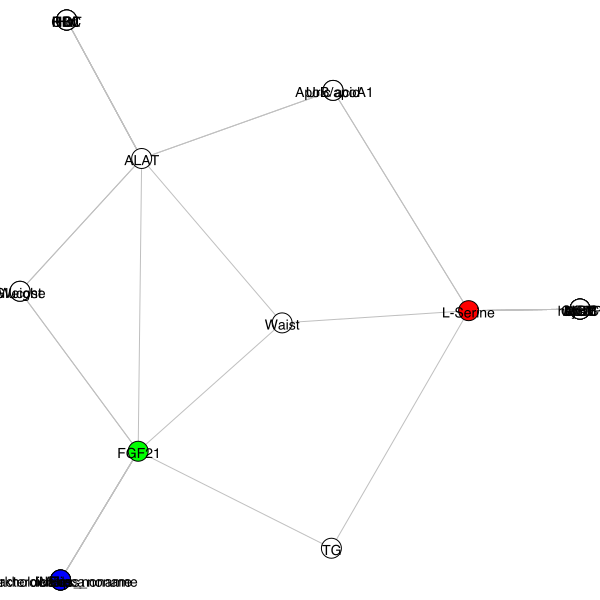

In [24]:
layout = network.layout_mds() #create layout

#color for analyte type
color_dictionary={'CLINICAL':'white','METABOLITE':'red','MICROBIOME':'blue', 'PROTEIN':'green'}
color_list=[color_dictionary[x] for x in network.vs['analyte_type']]

#label list is simplified from node name
label_list=[re.sub('\s\(.+','',x) for x in network.vs['name']]

igraph.plot(network, layout=layout, vertex_color=color_list, edge_color='silver', vertex_label=network.vs['short_name'])